In [3]:
import numpy as np
import pandas as pd

def split_samples(data, labels, n):
    data_train = data[:n]
    data_test = data[n:]
    labels_train = labels[:n]
    labels_test = labels[n:]
    
    return data_train, labels_train, data_test, labels_test

def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

def logistic_loss(labels, data, weights):
    # this seems wrong
    # at the very least it doesn't seem stable
    sigm = sigmoid(data @ weights)
    return (np.multiply(labels, np.log(sigm)) - 
            np.multiply(1-labels, np.log(1-sigm))).mean()

def predict(data, weights):
    return data @ weights >= 0

def accuracy(predictions, labels):
    return (1-np.logical_xor(predictions, labels[:,0]).mean()) * 100

def logistic_train(data, labels, epsilon=1e-5, maxiter=1000):
    eta = 1.0 # learning rate
    n,d = data.shape
    weights = np.zeros(d) # initialize weights
    
    loss = logistic_loss(labels, data, weights)
    for ix in range(maxiter):
        gradient = ((labels[:,0] - sigmoid(data @ weights)) @ data) / n # 
        weights += eta * gradient # update weights
        prev_loss = loss
        loss = logistic_loss(labels, data, weights)
        if np.abs(prev_loss - loss) < epsilon: # compare losses
            # never got it to converge :/ might be ll function is wrong
            print(f"Converged at step {ix}. Loss: {loss}")
            break
    return weights

parent = "CSE847/data/spam_email/"
data_path = parent+"data.txt"
label_path = parent+"labels.txt"

data = np.array(pd.read_csv(data_path, delim_whitespace=True, header=None))
labels = np.array(pd.read_csv(label_path, header=None))

accs = []

for train_size in [200, 500, 800, 1000, 1500, 2000]:
    data_train, labels_train, data_test, labels_test = split_samples(data, labels, train_size)
    weights = logistic_train(data_train, labels_train, maxiter=300)
    
    preds_train = predict(data_train, weights)
    preds_test = predict(data_test, weights)
    
    acc_train = accuracy(preds_train, labels_train)
    acc_test = accuracy(preds_test, labels_test)
    
    accs.append({'training size' : train_size, 'set' : 'training', 'accuracy' : acc_train})
    accs.append({'training size' : train_size, 'set' : 'test', 'accuracy' : acc_test})

<AxesSubplot:xlabel='training size', ylabel='accuracy'>

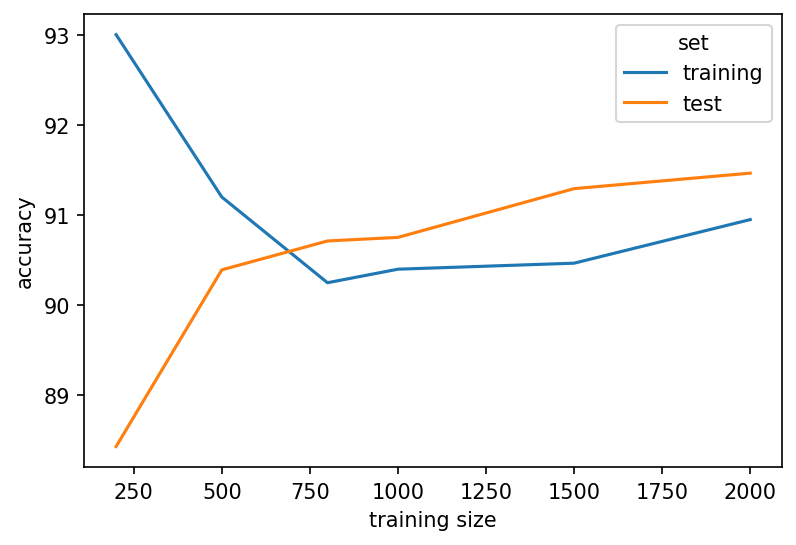

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,dpi=150)

sns.lineplot(
    data=pd.DataFrame(accs),
    x='training size',
    y='accuracy',
    hue='set'
)